In [49]:
import pandas as pd
import numpy as np
import nltk

# Downloading word corpus
nltk.download('punkt') # STEMMING
nltk.download('averaged_perceptron_tagger') # < Part Of Speech TAGGING
nltk.download('wordnet') # LEMMATISATION dictionary
nltk.download('stopwords') # STOPWORDS -- common stopwords in different languages

[nltk_data] Downloading package punkt to /Users/yotorng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yotorng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/yotorng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yotorng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
pip install pandas==1.3.0.

Note: you may need to restart the kernel to use updated packages.


In [51]:
#importing for IG
IG_df = pd.read_csv('XDS Sustainability IRL Event Data x IG Posts x P5Y.tsv', sep='\t')
IG_df.head()
IG_df.columns

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['user_id', 'user_name', 'post_id', 'post_shortcode', 'post_type',
       'post_date', 'post_caption', 'post_tagged_users', 'post_hashtags',
       'post_mentions', 'post_comments', 'post_likes', 'segment_name'],
      dtype='object')

In [52]:
#data cleaning
#drop the irrelevant columns
IG_df_cleaned = IG_df.drop(columns=['user_id', 'user_name', 'post_id', 'post_shortcode', 'post_type',
       'post_date','post_tagged_users', 'post_hashtags',
       'post_mentions', 'post_comments', 'post_likes'], axis=1)
IG_df_cleaned.head()

,post_caption,segment_name
0,Collin Tomahawk . Thank you @anonymised_user f...,Optimistic Providers
1,I start to play with all kinds of ingredients ...,Optimistic Providers
2,Crocheted hand sanitizer pouches and sew token...,Optimistic Providers
3,Thank you @anonymised_user for this beautiful ...,Optimistic Providers
4,Thank you neighbour @anonymised_user and Amigo...,Optimistic Providers


In [53]:
IG_df_cleaned['post_caption'] = IG_df_cleaned['post_caption'].astype('str')
IG_df_cleaned['post_caption'].head()

0    Collin Tomahawk . Thank you @anonymised_user f...
1    I start to play with all kinds of ingredients ...
2    Crocheted hand sanitizer pouches and sew token...
3    Thank you @anonymised_user for this beautiful ...
4    Thank you neighbour @anonymised_user and Amigo...
Name: post_caption, dtype: object

In [72]:
## Load the regular expression library
import re

# Remove punctuation
IG_df_cleaned['post_caption_processed'] = \
IG_df_cleaned['post_caption'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
IG_df_cleaned['post_caption_processed'] = \
IG_df_cleaned['post_caption'].map(lambda x: x.lower())

#remove words with less than 2 characters
IG_df_cleaned['post_caption_processed'] = \
IG_df_cleaned['post_caption'].map(lambda x: re.sub(r'\W*\b\w{1,3}\b','' ,x))

# Print out the first rows of papers
IG_df_cleaned['post_caption_processed'].head()

<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
<ipython-input-72-0bab2b70d1c6>:6: DeprecationWarning: invalid escape sequence \.
  IG_df_cleaned['post_caption'].map(lambda x: re.sub('[,\.!?]', '', x))


0    Collin Tomahawk . Thank @anonymised_user vouch...
1     start play with kinds ingredients kitchen whe...
2    Crocheted hand sanitizer pouches token cover s...
3    Thank @anonymised_user this beautiful Birthday...
4    Thank neighbour @anonymised_user Amigo supplyi...
Name: post_caption_processed, dtype: object

In [8]:
IG_df_cleaned

,post_caption,segment_name,post_caption_processed
0,Collin Tomahawk . Thank you @anonymised_user f...,Optimistic Providers,collin tomahawk . thank you @anonymised_user f...
1,I start to play with all kinds of ingredients ...,Optimistic Providers,i start to play with all kinds of ingredients ...
2,Crocheted hand sanitizer pouches and sew token...,Optimistic Providers,crocheted hand sanitizer pouches and sew token...
3,Thank you @anonymised_user for this beautiful ...,Optimistic Providers,thank you @anonymised_user for this beautiful ...
4,Thank you neighbour @anonymised_user and Amigo...,Optimistic Providers,thank you neighbour @anonymised_user and amigo...
...,...,...,...
404857,sometimes its rlly discouraging to see how the...,Eco Changemakers,sometimes its rlly discouraging to see how the...
404858,lunch with this loser! we r dysfunctional and ...,Eco Changemakers,lunch with this loser! we r dysfunctional and ...
404859,this took me so long to post because i kept fe...,Eco Changemakers,this took me so long to post because i kept fe...
404860,it was a struggle to even post this because th...,Eco Changemakers,it was a struggle to even post this because th...


In [19]:
!pip install gensim
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend([ 'anonymised_user', 'anonymised_user', 'https','co'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = IG_df_cleaned.post_caption_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yotorng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['collin', 'tomahawk', 'thank', 'vouchers', 'remaining', 'amount']


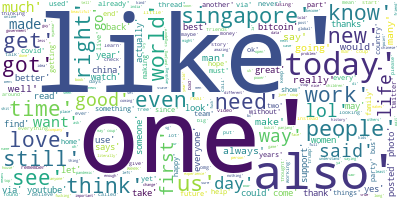

In [11]:
# Import the wordcloud library
!pip install wordcloud
from wordcloud import WordCloud

# Join the different processed titles together.
#long_string = ','.join(data_words)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(str(data_words))

# Visualize the word cloud
wordcloud.to_image()

In [28]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 9), (6, 1), (7, 2), (8, 1), (9, 5), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 5), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


In [13]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [14]:
from pprint import pprint

#we will build a model with 10 topics where each topic is a combination of keywords, 
#and each keyword contributes a certain weightage to the topic.
#10 topics, 10 keywords

# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"coup" + 0.015*"military" + 0.013*"myanmar" + 0.010*"people" + '
  '0.008*"may" + 0.007*"junta" + 0.007*"morning" + 0.007*"june" + '
  '0.006*"terrorists" + 0.006*"oh"'),
 (1,
  '0.016*"covid" + 0.011*"yes" + 0.010*"singapore" + 0.006*"new" + '
  '0.005*"first" + 0.004*"health" + 0.004*"going" + 0.004*"bus" + '
  '0.004*"travel" + 0.003*"vaccine"'),
 (2,
  '0.013*"de" + 0.010*"trans" + 0.009*"di" + 0.006*"da" + 0.006*"ha" + '
  '0.006*"hai" + 0.006*"ke" + 0.005*"utter" + 0.004*"ri" + 0.004*"ji"'),
 (3,
  '0.019*"people" + 0.015*"like" + 0.008*"know" + 0.008*"think" + 0.007*"get" '
  '+ 0.007*"want" + 0.006*"really" + 0.006*"one" + 0.006*"need" + '
  '0.006*"would"'),
 (4,
  '0.010*"singapore" + 0.006*"life" + 0.006*"new" + 0.006*"via" + '
  '0.005*"bitcoin" + 0.004*"omg" + 0.004*"business" + 0.004*"like" + '
  '0.003*"time" + 0.003*"go"'),
 (5,
  '0.018*"like" + 0.010*"good" + 0.009*"shit" + 0.009*"one" + 0.007*"im" + '
  '0.007*"happy" + 0.007*"get" + 0.006*"feel" + 0.00

In [33]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, id2word)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:1

In [16]:
pyLDAvis.display(lda_viz)
#Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

#A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

#A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.


In [46]:
pyLDAvis.save_html(lda_viz, 'TW lda viz.html')
#more about the visualisation https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
#all together

In [73]:
#splitting
IG_df_cleaned['segment_name'].unique()

grped = IG_df_cleaned.groupby("segment_name")

pragheart = grped.get_group("Pragmatic heartlanders")
pop_fwrs= grped.get_group("Pop Culture Followers")
opt_pvdr= grped.get_group("Optimistic Providers")
#eco_ftr = grped.get_group('Eco Futurists')
eco_chmk = grped.get_group('Eco Changemakers')
soc_mvn = grped.get_group('Socially Engaged Mavens')
#na = grped.get_group(np.nan)

In [10]:
IG_df_cleaned['segment_name'].unique()

array(['Optimistic Providers', 'Socially Engaged Mavens',
       'Eco Changemakers', 'Pop Culture Followers',
       'Pragmatic heartlanders', nan], dtype=object)

In [17]:
pragheart['post_caption_processed']

225       .\nschool is closed today, so lil hanhan gets ...
226       . \nthis was taken on our last night before th...
227       .\nit all started with random thoughts and tal...
228       .\nthank you @anonymised_user for being part o...
229       .\nthis guy loves to eat. so far hes been enjo...
                                ...                        
404512    escape room with the boss?? definitely not eve...
404513    love y'all like i love me some good auntie dea...
404514    blessed birthday to one of my fav people in th...
404515    thank god for friendly and adorable dogs in th...
404516    quaint little japanese village, in a region wi...
Name: post_caption_processed, Length: 54308, dtype: object

In [74]:
#data cleaning

#STEP 1: create function to remove stopwords 

stop_words = stopwords.words('english')
stop_words.extend([ 'anonymised_user', 'anonymised_user', 'https','co'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


#STEP 2: create function to get phrases

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigam(texts):
    return [trigram_mod[doc] for doc in texts]

#STEP 3: LEMMATISATION
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [21]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [34]:
import spacy
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (<ipython-input-34-9ed346e20e4a>, line 2)

In [75]:
import spacy

#prag heart
#STEP 3: APPLY
data = pragheart['post_caption_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# Form Trigrams
data_words_trigrams = make_trigam(data_words_nostops)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_trigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

final_data_words = data_words_bigrams
print(final_data_words[:1][0][:30])

['school', 'closed', 'today', 'hanhan', 'gets', 'play', 'loves', 'song', 'like', 'ride', 'bicycle', 'always', 'pointing', 'bicycles', 'papa', 'thought', 'bring', 'bike', 'ride', 'mama', 'think', 'positive', 'idea', 'could', 'hardly', 'remained', 'seated', 'long', 'seat', 'stroller']


In [25]:
import gensim.corpora as corpora

In [100]:
#prag heart topic
# Create Dictionary
id2word_ph = corpora.Dictionary(final_data_words)
# Create Corpus
texts_ph = final_data_words
# Term Document Frequency
corpus_ph = [id2word_ph.doc2bow(text) for text in texts]

In [77]:
from pprint import pprint

#we will build a model with 5 topics where each topic is a combination of keywords, 
#and each keyword contributes a certain weightage to the topic.

# number of topics
num_topics = 5
# Build LDA model
ph_lda_model = gensim.models.LdaMulticore(corpus=corpus_ph,
                                       id2word=id2word_ph,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(ph_lda_model.print_topics())
ph_doc_lda = ph_lda_model[corpus]

[(0,
  '0.006*"time" + 0.006*"good" + 0.006*"day" + 0.005*"like" + 0.005*"us" + '
  '0.005*"year" + 0.004*"love" + 0.004*"life" + 0.004*"new" + 0.004*"today"'),
 (1,
  '0.011*"tian" + 0.007*"ularpura" + 0.006*"day" + 0.006*"instagram" + '
  '0.006*"singapore" + 0.005*"new" + 0.005*"igshid" + 0.004*"time" + '
  '0.004*"tampinescentral" + 0.004*"bedoknorthst"'),
 (2,
  '0.007*"food" + 0.007*"today" + 0.006*"singapore" + 0.006*"foodie" + '
  '0.005*"sgfoodporn" + 0.005*"foodporn" + 0.005*"love" + 0.004*"foodpics" + '
  '0.004*"time" + 0.004*"sgfood"'),
 (3,
  '0.006*"day" + 0.005*"photo" + 0.004*"us" + 0.004*"dinner" + 0.004*"happy" + '
  '0.004*"travel" + 0.004*"singapore" + 0.003*"time" + 0.003*"back" + '
  '0.003*"instagram"'),
 (4,
  '0.011*"happy" + 0.010*"love" + 0.007*"day" + 0.006*"birthday" + 0.006*"cny" '
  '+ 0.005*"food" + 0.005*"like" + 0.004*"foodlover" + 0.004*"time" + '
  '0.004*"stay"')]


In [78]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [79]:
ph_lda_viz = gensimvis.prepare(ph_lda_model, corpus_ph, id2word_ph)
pyLDAvis.display(ph_lda_viz)
#Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

#A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

#A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.


/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [97]:

pyLDAvis.save_html(ph_lda_viz, 'IG ph lda viz.html')

In [110]:
pip install datapane

     |████████████████████████████████| 2.6 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 727 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 120 kB/s eta 0:00:01    |██████▏                         | 3.4 MB 3.1 MB/s eta 0:00:05     |████████                        | 4.4 MB 3.1 MB/s eta 0:00:05     |███████████████▏                | 8.3 MB 2.9 MB/s eta 0:00:04     |█████████████████████▏          | 11.6 MB 3.2 MB/s eta 0:00:02     |███████████████████████▍        | 12.8 MB 3.2 MB/s eta 0:00:02
     |████████████████████████████████| 193 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 3.7 MB/s eta 0:00:011
     |████████████████████████████████| 45 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 669 kB/s eta 0:00:01:01
     |████████████████████████████████| 54 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 210 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 1.2 M

  Created wheel for micawber: filename=micawber-0.5.4-py3-none-any.whl size=22358 sha256=f21a3be0699988f50dd57898c3b16f26d6d38d8311dd27d176e496d0208255d7
  Stored in directory: /Users/yotorng/Library/Caches/pip/wheels/c1/b6/81/f8237c6061ac239fe1079fa35b445460b5ed090f5267fa3a37
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3576 sha256=53ad57e693ed0c86943d930c79b21cadce0f972a71e210c7e7e6d139599c2112
  Stored in directory: /Users/yotorng/Library/Caches/pip/wheels/86/ab/a3/a8fa7e0a07e80f547e03468c03827f8257f7339327986faed1
  Created wheel for face: filename=face-20.1.1-py3-none-any.whl size=51078 sha256=c1996283e7c22a42865a644909921fbe12cabb00e44e078388c5b7d686428e5b
  Stored in directory: /Users/yotorng/Library/Caches/pip/wheels/67/03/c2/76d2e1e694852ce409ac2938b9f461bc0fdf3789901e7bb1f0
Successfully built micawber stringcase face
  Attempting uninstall: toolz
    Found existing installation: toolz 0.10.0
    Uninstalling toolz-0.10.0:
      Successfully 

In [118]:
import datapane as dp
your_token = 'aef209f7d64511ef469211bf5fba31b3bee70d71'
dp.login(token=your_token)


Connected successfully to https://datapane.com as yotorng


'yotorng'

In [119]:
import datapane as dp 
dp.Report(
    dp.Plot(ph_lda_viz.html),
    
).upload(name="pragmatic heartlanders lda viz")

Bokeh version 1.4.0 is not supported, these plots may not display correctly, please install version ~=2.2.0


DPError: Can't embed object as a plot
Please run with `dp.enable_logging()`, restart your Jupyter kernel/Python instance, and/or visit https://www.github.com/datapane/datapane to raise issue / discuss if error repeats

In [104]:

def format_topics_sentences(ldamodel=ph_lda_model, corpus=corpus_ph, texts=texts_ph):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (num_topics, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(num_topics)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(num_topics), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ph_lda_model, corpus=corpus_ph, texts=texts_ph)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9921,"time, good, day, like, us, year, love, life, n...","[school, closed, today, hanhan, gets, play, lo..."
1,1,0.0,0.7630,"time, good, day, like, us, year, love, life, n...","[taken, last, night, shift, slightly, week, se..."
2,2,0.0,0.7280,"time, good, day, like, us, year, love, life, n...","[started, random, thoughts, talks, moving, sta..."
3,3,0.0,0.9910,"time, good, day, like, us, year, love, life, n...","[thank, part, life, without, thank, taking_car..."
4,4,2.0,0.4883,"food, today, singapore, foodie, sgfoodporn, fo...","[loves, enjoying, food, introduced, last, plus..."
5,5,2.0,0.7599,"food, today, singapore, foodie, sgfoodporn, fo...","[little, chub, enjoys, every, bedtime, smile, ..."
6,6,0.0,0.4352,"time, good, day, like, us, year, love, life, n...","[hansel, loves, multi, task, likes, eyes_peele..."
7,7,4.0,0.7590,"happy, love, day, birthday, cny, food, like, f...","[tuesday, mood, hansel, loves, camera, include..."
8,8,2.0,0.8358,"food, today, singapore, foodie, sgfoodporn, fo...","[mama, hope, love, books, last, long, lpscasti..."
9,9,2.0,0.5336,"food, today, singapore, foodie, sgfoodporn, fo...","[love, loving, character, expression, look, li..."


In [105]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9957,"time, good, day, like, us, year, love, life, new, today","[hrs, move, thanksgiving, slept, min, night, silly, queues, queues, rejected, airport, auto, che..."
1,1.0,0.9944,"tian, ularpura, day, instagram, singapore, new, igshid, time, tampinescentral, bedoknorthst","[calon, politisi, ularpura, asia, tenggara, resesi, pertumbuhan, ekonomi, ularpura, meningkat, d..."
2,2.0,0.9951,"food, today, singapore, foodie, sgfoodporn, foodporn, love, foodpics, time, sgfood","[calon, presiden, ularpura, merencanakan, akan, memasang, menerapkan, pembayaran, pajak, negara,..."
3,3.0,0.9924,"day, photo, us, dinner, happy, travel, singapore, time, back, instagram","[nice, picture, stare, repost, paddling, pieman, river, beautiful, video, thanks, laura, cameron..."
4,4.0,0.9937,"happy, love, day, birthday, cny, food, like, foodlover, time, stay","[posted, nearly, million, marine, areas, designated, marine, protected, areas, mpas, according, ..."


In [80]:
import spacy


#pop fwrs
#STEP 3: APPLY
data = pop_fwrs['post_caption_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# Form Trigrams
data_words_trigrams = make_trigam(data_words_nostops)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_trigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

popf_data_words = data_words_bigrams
print(popf_data_words[:1][0][:30])

['know', 'type', 'right', 'wearing', 'candi']


In [81]:
#pop followers topic
# Create Dictionary
id2word_pf = corpora.Dictionary(popf_data_words)
# Create Corpus
texts_pf = final_data_words
# Term Document Frequency
corpus_pf = [id2word_pf.doc2bow(text) for text in texts]

from pprint import pprint

#we will build a model with 5 topics where each topic is a combination of keywords, 
#and each keyword contributes a certain weightage to the topic.

# number of topics
num_topics = 5
# Build LDA model
pf_lda_model = gensim.models.LdaMulticore(corpus=corpus_pf,
                                       id2word=id2word_pf,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(pf_lda_model.print_topics())
pf_doc_lda = pf_lda_model[corpus]

[(0,
  '0.006*"christmas" + 0.004*"year" + 0.004*"like" + 0.004*"singapore" + '
  '0.003*"aviation" + 0.003*"airplane" + 0.003*"day" + 0.003*"love" + '
  '0.003*"aeroplane" + 0.003*"one"'),
 (1,
  '0.007*"today" + 0.007*"foodie" + 0.007*"food" + 0.007*"foodporn" + '
  '0.006*"love" + 0.005*"foodlover" + 0.005*"foodpost" + 0.005*"sgfoodporn" + '
  '0.005*"dinner" + 0.005*"day"'),
 (2,
  '0.008*"happy" + 0.006*"skin" + 0.005*"love" + 0.004*"pulau" + '
  '0.004*"singapore" + 0.004*"year" + 0.004*"new" + 0.003*"pax" + '
  '0.003*"night" + 0.003*"another"'),
 (3,
  '0.009*"singapore" + 0.006*"food" + 0.005*"love" + 0.005*"scent" + '
  '0.005*"happy" + 0.005*"new" + 0.004*"sg" + 0.004*"today" + '
  '0.004*"sgfoodporn" + 0.004*"back"'),
 (4,
  '0.010*"day" + 0.008*"time" + 0.007*"one" + 0.006*"good" + 0.006*"like" + '
  '0.005*"tian" + 0.005*"us" + 0.005*"life" + 0.005*"love" + 0.004*"happy"')]


In [82]:
pf_lda_viz = gensimvis.prepare(pf_lda_model, corpus_pf, id2word_pf)
pyLDAvis.display(pf_lda_viz)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [96]:

pyLDAvis.save_html(pf_lda_viz, 'IG pf lda viz.html')

In [106]:
pf_df_topic_sents_keywords = format_topics_sentences(ldamodel=pf_lda_model, corpus=corpus_pf, texts=texts_pf)

# Format
pf_df_dominant_topic = pf_df_topic_sents_keywords.reset_index()
pf_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
pf_df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9920,"day, time, one, good, like, tian, us, life, love, happy","[school, closed, today, hanhan, gets, play, loves, song, like, ride, bicycle, always, pointing, ..."
1,1,4.0,0.6962,"day, time, one, good, like, tian, us, life, love, happy","[taken, last, night, shift, slightly, week, settling, well, house, known, hanhan, must, efficien..."
2,2,4.0,0.9631,"day, time, one, good, like, tian, us, life, love, happy","[started, random, thoughts, talks, moving, stay, near, laws, always, list, pros, cons, shifting,..."
3,3,4.0,0.9908,"day, time, one, good, like, tian, us, life, love, happy","[thank, part, life, without, thank, taking_care, many, years, especially, last, years, althou, n..."
4,4,4.0,0.7550,"day, time, one, good, like, tian, us, life, love, happy","[loves, enjoying, food, introduced, last, plus, mths, comes, milk, super, sensitive, particular,..."
5,5,0.0,0.9484,"christmas, year, like, singapore, aviation, airplane, day, love, aeroplane, one","[little, chub, enjoys, every, bedtime, smile, wakes, good, priceless, lpscastingcall, sgtoddler,..."
6,6,0.0,0.9672,"christmas, year, like, singapore, aviation, airplane, day, love, aeroplane, one","[hansel, loves, multi, task, likes, eyes_peeled, rainbow, chicks, stream, praise, television, ho..."
7,7,4.0,0.4382,"day, time, one, good, like, tian, us, life, love, happy","[tuesday, mood, hansel, loves, camera, includes, snatching, phone, take, picture, videos, always..."
8,8,0.0,0.8765,"christmas, year, like, singapore, aviation, airplane, day, love, aeroplane, one","[mama, hope, love, books, last, long, lpscastingcall, sgtoddler, sgbaby, instatoddler, sgkidsmod..."
9,9,0.0,0.6320,"christmas, year, like, singapore, aviation, airplane, day, love, aeroplane, one","[love, loving, character, expression, look, like, moment, smile, silly, next, moment, days, driv..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = pf_df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

In [83]:
#optimistic providers

#STEP 3: APPLY
data = opt_pvdr['post_caption_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# Form Trigrams
data_words_trigrams = make_trigam(data_words_nostops)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_trigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

optp_data_words = data_words_bigrams
print(optp_data_words[:1][0][:30])

['collin', 'tomahawk', 'thank', 'vouchers', 'remaining', 'amount']


In [84]:
#optimistic providers topic
# Create Dictionary
id2word_op = corpora.Dictionary(optp_data_words)
# Create Corpus
texts_op = final_data_words
# Term Document Frequency
corpus_op = [id2word_op.doc2bow(text) for text in texts]

from pprint import pprint

#we will build a model with 5 topics where each topic is a combination of keywords, 
#and each keyword contributes a certain weightage to the topic.

# number of topics
num_topics = 5
# Build LDA model
op_lda_model = gensim.models.LdaMulticore(corpus=corpus_op,
                                       id2word=id2word_op,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(op_lda_model.print_topics())
op_doc_lda = op_lda_model[corpus]

[(0,
  '0.007*"time" + 0.006*"day" + 0.005*"life" + 0.005*"skin" + 0.004*"cny" + '
  '0.004*"singapore" + 0.004*"tenggara" + 0.004*"asia" + 0.003*"work" + '
  '0.003*"us"'),
 (1,
  '0.012*"happy" + 0.008*"day" + 0.007*"year" + 0.006*"new" + 0.006*"one" + '
  '0.006*"love" + 0.006*"time" + 0.006*"us" + 0.005*"like" + 0.005*"birthday"'),
 (2,
  '0.008*"today" + 0.007*"food" + 0.005*"like" + 0.005*"sgfoodporn" + '
  '0.005*"time" + 0.005*"foodie" + 0.005*"foodporn" + 0.004*"one" + '
  '0.004*"good" + 0.004*"foodpost"'),
 (3,
  '0.012*"tian" + 0.007*"day" + 0.007*"www" + 0.007*"singapore" + '
  '0.007*"instagram" + 0.005*"love" + 0.005*"instagood" + 0.005*"food" + '
  '0.005*"thank" + 0.005*"today"'),
 (4,
  '0.006*"singapore" + 0.005*"love" + 0.004*"skin" + 0.004*"one" + '
  '0.004*"like" + 0.004*"get" + 0.004*"www" + 0.003*"time" + 0.003*"good" + '
  '0.003*"new"')]


In [85]:
op_lda_viz = gensimvis.prepare(op_lda_model, corpus_op, id2word_op)
pyLDAvis.display(op_lda_viz)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [95]:

pyLDAvis.save_html(op_lda_viz, 'IG op lda viz.html')

In [107]:
op_df_topic_sents_keywords = format_topics_sentences(ldamodel=op_lda_model, corpus=corpus_op, texts=texts_op)

# Format
op_df_dominant_topic = op_df_topic_sents_keywords.reset_index()
op_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(op_df_dominant_topic.head(10))


# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = op_df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)


   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.7026   
1            1             1.0              0.8596   
2            2             4.0              0.5534   
3            3             1.0              0.9911   
4            4             4.0              0.9828   
5            5             0.0              0.7664   
6            6             0.0              0.9751   
7            7             1.0              0.6649   
8            8             0.0              0.9566   
9            9             0.0              0.5976   

                                                          Keywords  \
0       happy, day, year, new, one, love, time, us, like, birthday   
1       happy, day, year, new, one, love, time, us, like, birthday   
2      singapore, love, skin, one, like, get, www, time, good, new   
3       happy, day, year, new, one, love, time, us, like, birthday   
4      singapore, love, skin, one, like, get, www, time

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9964,"time, day, life, skin, cny, singapore, tenggara, asia, work, us","[pernahkah, anda, mendengar, bahwa, biaya, hidup, singapura, murah, mana, anda, mendengarnya, ba..."
1,1.0,0.9954,"happy, day, year, new, one, love, time, us, like, birthday","[helpchyall, sunshine, mother, friend, dear, throughout, life, always, near, tender, smile, guid..."
2,2.0,0.9938,"today, food, like, sgfoodporn, time, foodie, foodporn, one, good, foodpost","[lime, honey, fried_chicken, love, using, goldenchef, sesame, smell, good, made, singapore, also..."
3,3.0,0.9893,"tian, day, www, singapore, instagram, love, instagood, food, thank, today","[nian, ling, ling, nian, zhong, xiao, zhong, tian, xiao, tian, xiao, zhong, zhong, tian, shang, ..."
4,4.0,0.9953,"singapore, love, skin, one, like, get, www, time, good, new","[sharing, products, reaching, past, months, happy, skin, taking, well, latest, brand, addition, ..."


In [86]:
#Eco Changemakers


#STEP 3: APPLY
data = eco_chmk['post_caption_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# Form Trigrams
data_words_trigrams = make_trigam(data_words_nostops)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_trigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

ecoc_data_words = data_words_bigrams
print(ecoc_data_words[:1][0][:30])

['pineapple', 'thailand', 'super', 'sweet', 'cute', 'time']


In [87]:
#Eco Changemakers topic
# Create Dictionary
id2word_ec = corpora.Dictionary(ecoc_data_words)
# Create Corpus
texts_ec = final_data_words
# Term Document Frequency
corpus_ec = [id2word_ec.doc2bow(text) for text in texts]

from pprint import pprint

#we will build a model with 5 topics where each topic is a combination of keywords, 
#and each keyword contributes a certain weightage to the topic.

# number of topics
num_topics = 5
# Build LDA model
ec_lda_model = gensim.models.LdaMulticore(corpus=corpus_ec,
                                       id2word=id2word_ec,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(ec_lda_model.print_topics())
ec_doc_lda = ec_lda_model[corpus]

[(0,
  '0.009*"tian" + 0.008*"food" + 0.008*"today" + 0.006*"foodie" + '
  '0.006*"foodporn" + 0.006*"sgfoodporn" + 0.005*"day" + 0.005*"happy" + '
  '0.005*"foodpost" + 0.005*"foodoftheday"'),
 (1,
  '0.006*"tenggara" + 0.005*"asia" + 0.004*"christmas" + 0.004*"chicken" + '
  '0.004*"dinner" + 0.004*"singapore" + 0.003*"yummy" + 0.003*"food" + '
  '0.003*"rice" + 0.003*"day"'),
 (2,
  '0.007*"love" + 0.006*"good" + 0.006*"year" + 0.006*"time" + 0.006*"one" + '
  '0.006*"singapore" + 0.005*"skin" + 0.005*"day" + 0.005*"like" + '
  '0.005*"always"'),
 (3,
  '0.007*"time" + 0.005*"singapore" + 0.005*"us" + 0.005*"day" + 0.004*"like" '
  '+ 0.004*"love" + 0.004*"one" + 0.004*"new" + 0.004*"know" + 0.004*"happy"'),
 (4,
  '0.008*"day" + 0.004*"today" + 0.004*"love" + 0.004*"new" + 0.004*"one" + '
  '0.003*"happy" + 0.003*"pm" + 0.003*"really" + 0.003*"back" + 0.003*"time"')]


In [88]:
ec_lda_viz = gensimvis.prepare(ec_lda_model, corpus_ec, id2word_ec)
pyLDAvis.display(ec_lda_viz)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [94]:

pyLDAvis.save_html(ec_lda_viz, 'IG ec lda viz.html')

In [108]:
ec_df_topic_sents_keywords = format_topics_sentences(ldamodel=ec_lda_model, corpus=corpus_ec, texts=texts_ec)

# Format
ec_df_dominant_topic = ec_df_topic_sents_keywords.reset_index()
ec_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(ec_df_dominant_topic.head(10))


# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = ec_df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)


   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             4.0              0.4525   
1            1             4.0              0.3572   
2            2             4.0              0.6459   
3            3             2.0              0.9907   
4            4             0.0              0.5967   
5            5             3.0              0.9517   
6            6             3.0              0.9718   
7            7             3.0              0.8377   
8            8             3.0              0.8018   
9            9             3.0              0.9709   

                                                                              Keywords  \
0                            day, today, love, new, one, happy, pm, really, back, time   
1                            day, today, love, new, one, happy, pm, really, back, time   
2                            day, today, love, new, one, happy, pm, really, back, time   
3                      love, good, year, time

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9880,"tian, food, today, foodie, foodporn, sgfoodporn, day, happy, foodpost, foodoftheday","[lesser, hair, falls, week, gindouble, essential, today, ginger, essence, shampoo, ml, effective..."
1,1.0,0.9947,"tenggara, asia, christmas, chicken, dinner, singapore, yummy, food, rice, day","[huan, dang, nian, shang, chang, shou, xiang, dang, huan, chou, bing, mian, liao, huan, chun, fe..."
2,2.0,0.9953,"love, good, year, time, one, singapore, skin, day, like, always","[sure, everyone, heard, brand, bioderma, originates, france, well, known, brand, really, excited..."
3,3.0,0.9952,"time, singapore, us, day, like, love, one, new, know, happy","[public, toilets, always, something, bothers, many, know, clean, seat, covers, water, cisterns, ..."
4,4.0,0.9919,"day, today, love, new, one, happy, pm, really, back, time","[seen, sing, dance, perform, established, local, musicals, triple, threat, kimberly, chan, makin..."


In [89]:

#Socially Engaged Mavens


#STEP 3: APPLY
data = soc_mvn['post_caption_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# Form Trigrams
data_words_trigrams = make_trigam(data_words_nostops)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_trigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

socm_data_words = data_words_bigrams
print(socm_data_words[:1][0][:30])

[]


In [90]:
##Socially Engaged Mavens topic
# Create Dictionary
id2word_sm = corpora.Dictionary(socm_data_words)
# Create Corpus
texts_sm = final_data_words
# Term Document Frequency
corpus_sm = [id2word_sm.doc2bow(text) for text in texts]

from pprint import pprint

#we will build a model with 5 topics where each topic is a combination of keywords, 
#and each keyword contributes a certain weightage to the topic.

# number of topics
num_topics = 5
# Build LDA model
sm_lda_model = gensim.models.LdaMulticore(corpus=corpus_sm,
                                       id2word=id2word_sm,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(sm_lda_model.print_topics())
sm_doc_lda = sm_lda_model[corpus]

[(0,
  '0.015*"happy" + 0.008*"love" + 0.007*"year" + 0.007*"day" + '
  '0.007*"singapore" + 0.006*"birthday" + 0.006*"time" + 0.005*"stay" + '
  '0.005*"always" + 0.005*"one"'),
 (1,
  '0.015*"tian" + 0.007*"time" + 0.006*"instagram" + 0.005*"igshid" + '
  '0.005*"dinner" + 0.004*"today" + 0.004*"omg" + 0.003*"facebook" + '
  '0.003*"utm_source" + 0.003*"one"'),
 (2,
  '0.008*"day" + 0.007*"like" + 0.006*"one" + 0.006*"good" + 0.005*"time" + '
  '0.005*"love" + 0.005*"life" + 0.004*"today" + 0.004*"thank" + '
  '0.004*"singapore"'),
 (3,
  '0.007*"singapore" + 0.004*"aviation" + 0.004*"back" + 0.003*"airplane" + '
  '0.003*"aviationlovers" + 0.003*"aeroplane" + 0.003*"skin" + 0.003*"like" + '
  '0.003*"throwback" + 0.003*"time"'),
 (4,
  '0.009*"food" + 0.008*"today" + 0.007*"foodporn" + 0.007*"foodie" + '
  '0.005*"day" + 0.005*"sgfoodporn" + 0.005*"foodoftheday" + 0.004*"good" + '
  '0.004*"foodlover" + 0.004*"singaporefoodie"')]


In [91]:
sm_lda_viz = gensimvis.prepare(sm_lda_model, corpus_sm, id2word_sm)


/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [93]:

pyLDAvis.save_html(sm_lda_viz, 'IG sm lda viz.html')

In [120]:
sm_df_topic_sents_keywords = format_topics_sentences(ldamodel=sm_lda_model, corpus=corpus_sm, texts=texts_sm)

# Format
sm_df_dominant_topic = sm_df_topic_sents_keywords.reset_index()
sm_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(sm_df_dominant_topic.head(10))


# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = sm_df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)


   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.7098   
1            1             2.0              0.9779   
2            2             2.0              0.9885   
3            3             2.0              0.9745   
4            4             2.0              0.9694   
5            5             2.0              0.9594   
6            6             2.0              0.9079   
7            7             2.0              0.9760   
8            8             2.0              0.9521   
9            9             2.0              0.9720   

                                                          Keywords  \
0  day, like, one, good, time, love, life, today, thank, singapore   
1  day, like, one, good, time, love, life, today, thank, singapore   
2  day, like, one, good, time, love, life, today, thank, singapore   
3  day, like, one, good, time, love, life, today, thank, singapore   
4  day, like, one, good, time, love, life, today, thank

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9958,"happy, love, year, day, singapore, birthday, time, stay, always, one","[helpchyall, sunshine, mother, friend, dear, throughout, life, always, near, tender, smile, guid..."
1,1.0,0.9905,"tian, time, instagram, igshid, dinner, today, omg, facebook, utm_source, one","[gong, xing, cheng, gong, ting, dang, xing, meng, xiang, huan, xiao, xian, shang, huan, liang, z..."
2,2.0,0.9953,"day, like, one, good, time, love, life, today, thank, singapore","[skincareempties, recently, used, toner, moment, peeling, sleeping, pack, previously, used, slee..."
3,3.0,0.9917,"singapore, aviation, back, airplane, aviationlovers, aeroplane, skin, like, throwback, time","[repost, last, years, times, rapidly, respond, reports, spills, injured, trapped, marine, life, ..."
4,4.0,0.9922,"food, today, foodporn, foodie, day, sgfoodporn, foodoftheday, good, foodlover, singaporefoodie","[went, date, night, friend, gave, recommendation, nice, dinner, venue, menu, super, interesting,..."
